<a href="https://colab.research.google.com/github/mw2304/FreeformProgramming/blob/main/FreeFormProgrammingipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# using multiple csv files, so will need to merge them all for clarity and analysis.

import pandas as pd

quali = pd.read_csv('Formula1_2025Season_QualifyingResults.csv')
squali= pd.read_csv('Formula1_2025Season_SprintQualifyingResults.csv')
race = pd.read_csv('Formula1_2025Season_RaceResults.csv')
srace= pd.read_csv('Formula1_2025Season_SprintResults.csv')


In [2]:
#merge the data sets

f12025 = pd.merge(quali, race, on=["Driver", "Track"], suffixes=("_quali", "_race"))
f12025sprint = pd.merge(squali, srace, on=["Driver", "Track"], suffixes=("_squali", "_srace"))
#rename Team_quali
#rename team duplicates (differences in capitalisation spelling error etc)
f12025 = f12025.rename(columns={'Team_quali': 'Team'})
f12025['Team']=f12025['Team'].replace({'Red Bull Racing honda RBPT':'Red Bull Racing Honda RBPT','Racing Bulls honda RBPT': 'Racing Bulls Honda RBPT', 'Racing Honda RBPT':'Racing Bulls Honda RBPT', 'Racing bulls Honda RBPT': 'Racing Bulls Honda RBPT' })
display(f12025)
#display(f12025sprint)

#keeping datasets separate for 'cleanliness', focussing on just grand prix rather than sprint races
#changing




,Track,Position_quali,No_quali,Driver,Team,Q1,Q2,Q3,Laps_quali,Position_race,No_race,Team_race,Starting Grid,Laps_race,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
0,Australia,1,4,Lando Norris,McLaren Mercedes,1:15.912,1:15.415,1:15.096,20,1,4,McLaren Mercedes,1,57,1:42:06.304,25,Yes,1:22.167
1,Australia,2,81,Oscar Piastri,McLaren Mercedes,1:16.062,1:15.468,1:15.180,18,9,81,McLaren Mercedes,2,57,+20.448,2,No,1:23.242
2,Australia,3,1,Max Verstappen,Red Bull Racing Honda RBPT,1:16.018,1:15.565,1:15.481,17,2,1,Red Bull Racing Honda RBPT,3,57,+0.895,18,No,1:23.081
3,Australia,4,63,George Russell,Mercedes,1:15.971,1:15.798,1:15.546,21,3,63,Mercedes,4,57,+8.481,15,No,1:25.065
4,Australia,5,22,Yuki Tsunoda,Racing Bulls Honda RBPT,1:16.225,1:16.009,1:15.670,18,12,22,Racing Bulls Honda RBPT,5,57,+29.884,0,No,1:24.194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,Abu Dhabi,16,44,Lewis Hamilton,Ferrari,1:23.394,NaN,NaN,9,8,44,Ferrari,16,58,+72.670,4,No,1:28.094
474,Abu Dhabi,17,23,Alexander Albon,Williams Mercedes,1:23.416,NaN,NaN,6,16,23,Williams Mercedes,17,58,+90.327,0,No,1:28.367
475,Abu Dhabi,18,27,Nico Hulkenberg,Kick Sauber Ferrari,1:23.450,NaN,NaN,9,9,27,Kick Sauber Ferrari,18,58,+79.014,2,No,1:27.050
476,Abu Dhabi,19,10,Pierre Gasly,Alpine Renault,1:23.468,NaN,NaN,9,19,10,Alpine Renault,19,57,+1 lap,0,No,1:27.767


In [25]:
#all of the imports/ packages used

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit
from matplotlib.ticker import MaxNLocator


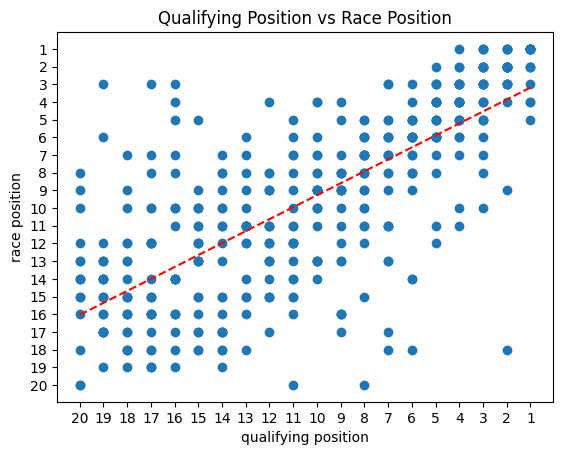

<Figure size 640x480 with 0 Axes>

In [4]:
#1. quali position vs race position

import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.polynomial import polyfit

#only include numerical data/ classfied finishes
f12025['Position_qualifin']= pd.to_numeric(f12025['Position_quali'], errors='coerce')
f12025['Position_racefin']= pd.to_numeric(f12025['Position_race'], errors='coerce')

# Drop rows with NaN values in the relevant columns for polyfit
data_for_polyfit = f12025.dropna(subset=['Position_qualifin', 'Position_racefin'])

# simple scatter plot
plt.scatter(data_for_polyfit['Position_qualifin'], data_for_polyfit['Position_racefin'])
plt.xlabel('qualifying position')
plt.ylabel('race position')
# reconfigures the axis so it is in integers for discrete data
max_pos = int(data_for_polyfit['Position_racefin'].max())
plt.yticks(np.arange(1, max_pos + 1, 1))
plt.xticks(np.arange(1, max_pos + 1, 1))
# have position 1 as top since it is the best position
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.title('Qualifying Position vs Race Position')
#plotting a linear fit to show trendline
z = np.polyfit(data_for_polyfit['Position_qualifin'], data_for_polyfit['Position_racefin'], 1)
p = np.poly1d(z)
plt.plot(data_for_polyfit['Position_qualifin'], p(data_for_polyfit['Position_qualifin']), "r--")
plt.figure()
plt.show()

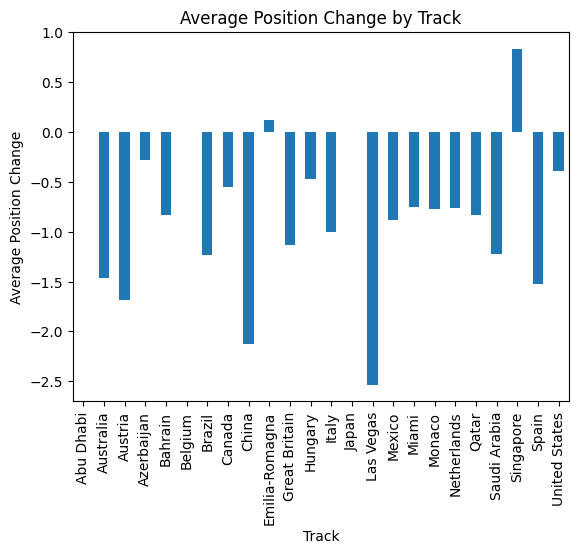

In [5]:
# 2. position changed per circuit

#only include numerical data
f12025['Position_qualifin']= pd.to_numeric(f12025['Position_quali'], errors='coerce')
f12025['Position_racefin']= pd.to_numeric(f12025['Position_race'], errors='coerce')

#creating column for position change
poschange = f12025['Position_racefin'] - f12025['Position_qualifin']
f12025['Position_change'] = poschange

#average by track
#where - is finishing better than qualifying, + is finshing lower down than qualifying
poschange_by_track = f12025.groupby('Track')['Position_change'].mean()
#print(poschange_by_track)

#bar plot
poschange_by_track.plot(kind='bar')
plt.xlabel('Track')
plt.ylabel('Average Position Change')
plt.title('Average Position Change by Track')
plt.show()

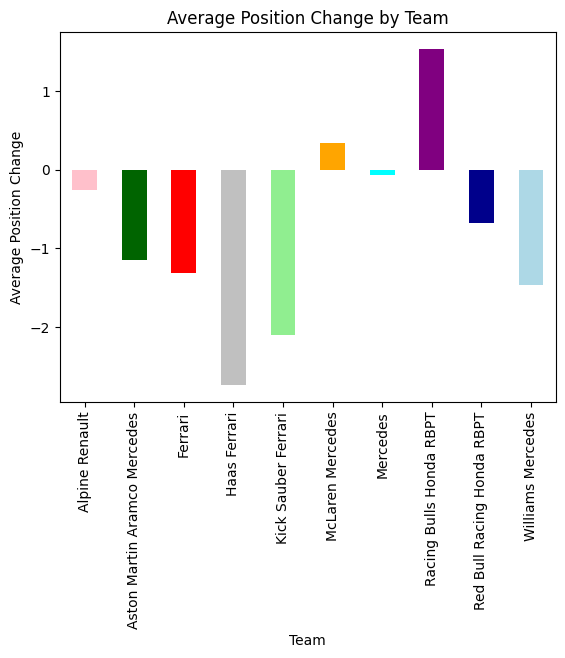

In [6]:
#3. sort by team instead of track
poschange_by_team = f12025.groupby('Team')['Position_change'].mean()

team_colors = {'Red Bull Racing Honda RBPT': 'darkblue', 'Racing Bulls Honda RBPT': 'purple', 'Mercedes' :'cyan', 'McLaren Mercedes': 'orange', 'Ferrari': 'red', 'Williams Mercedes': 'lightblue', 'Haas Ferrari': 'silver', 'Aston Martin Aramco Mercedes':'darkgreen', 'Kick Sauber Ferrari': 'lightgreen', 'Alpine Renault': 'pink'}
colors = [team_colors[team] for team in poschange_by_team.index]
#bar plot
poschange_by_team.plot(kind='bar', color=colors)
plt.xlabel('Team')
plt.ylabel('Average Position Change')
plt.title('Average Position Change by Team')
plt.show()
#- means making up a place (e.g 4th to 3rd), + losing a place (3rd to 4th)

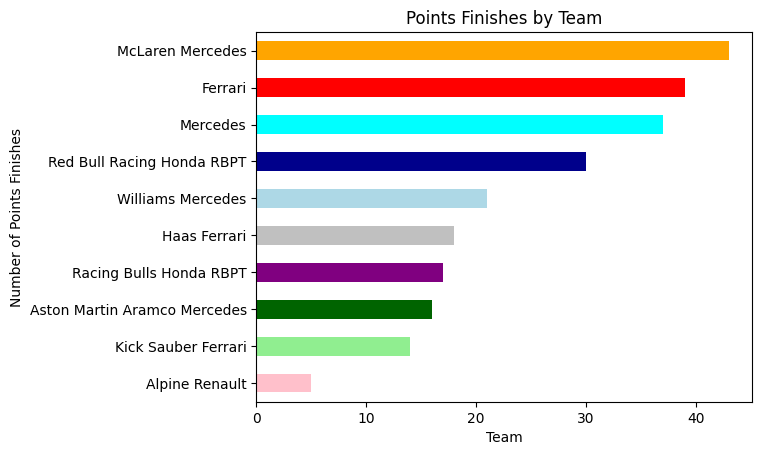

In [7]:
#4. number of point/podium finishes per team

f12025['pointsfinish'] = f12025['Points'] > 0


points_finishesbyteam = (f12025.groupby('Team')['pointsfinish'].sum().sort_values())
team_colors = {'Red Bull Racing Honda RBPT': 'darkblue', 'Racing Bulls Honda RBPT': 'purple', 'Mercedes' :'cyan', 'McLaren Mercedes': 'orange', 'Ferrari': 'red', 'Williams Mercedes': 'lightblue', 'Haas Ferrari': 'silver', 'Aston Martin Aramco Mercedes':'darkgreen', 'Kick Sauber Ferrari': 'lightgreen', 'Alpine Renault': 'pink'}
colors = [team_colors[team] for team in points_finishesbyteam.index]
points_finishesbyteam.plot(kind='barh', color=colors)
plt.title('Points Finishes by Team')
plt.xlabel('Team')
plt.ylabel('Number of Points Finishes')
plt.show()



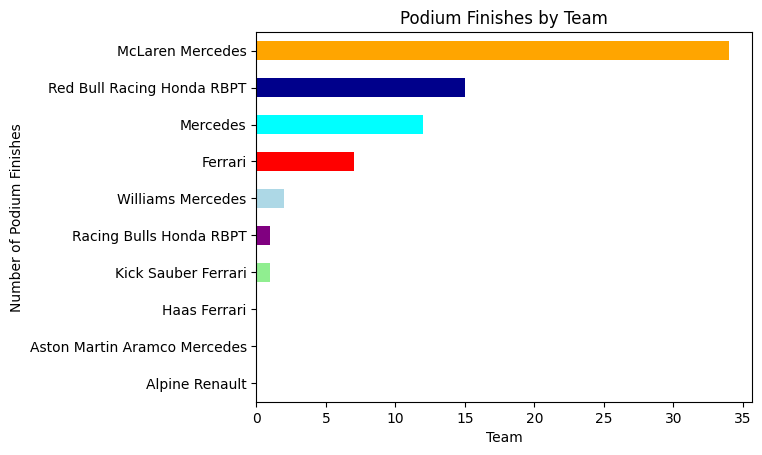

In [8]:
#5.podium finishes per team

f12025['podiumfinish'] = f12025['Points'] > 14 #15,18,25 awarded for podium

podium_finishesbyteam = (f12025.groupby('Team')['podiumfinish'].sum().sort_values())
team_colors = {'Red Bull Racing Honda RBPT': 'darkblue', 'Racing Bulls Honda RBPT': 'purple', 'Mercedes' :'cyan', 'McLaren Mercedes': 'orange', 'Ferrari': 'red', 'Williams Mercedes': 'lightblue', 'Haas Ferrari': 'silver', 'Aston Martin Aramco Mercedes':'darkgreen', 'Kick Sauber Ferrari': 'lightgreen', 'Alpine Renault': 'pink'}
colors = [team_colors[team] for team in podium_finishesbyteam.index]
podium_finishesbyteam.plot(kind='barh', color=colors)
plt.title('Podium Finishes by Team')
plt.xlabel('Team')
plt.ylabel('Number of Podium Finishes')
plt.show()


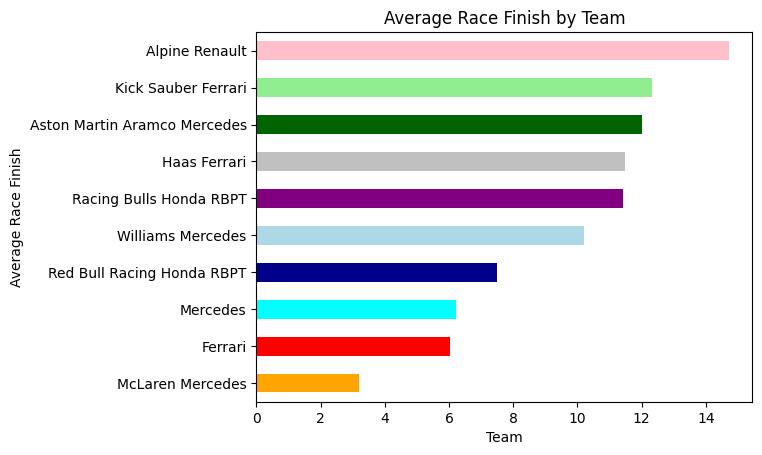

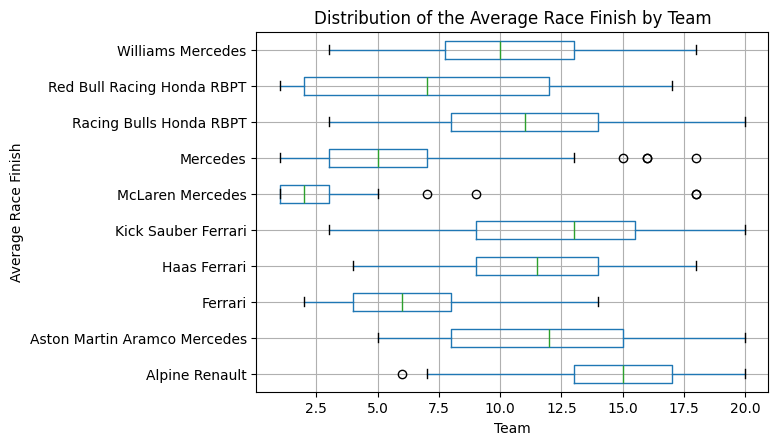

In [9]:
#6. average finish per race per team
f12025['Position_racefin']= pd.to_numeric(f12025['Position_race'], errors='coerce')
avgfinish_byteam = (f12025.groupby('Team')['Position_racefin'].mean().sort_values())
f12025=f12025.dropna(subset=['Position_racefin'])
#boxplot to show avergae and sd etc
team_colors = {'Red Bull Racing Honda RBPT': 'darkblue', 'Racing Bulls Honda RBPT': 'purple', 'Mercedes' :'cyan', 'McLaren Mercedes': 'orange', 'Ferrari': 'red', 'Williams Mercedes': 'lightblue', 'Haas Ferrari': 'silver', 'Aston Martin Aramco Mercedes':'darkgreen', 'Kick Sauber Ferrari': 'lightgreen', 'Alpine Renault': 'pink'}
colors = [team_colors[team] for team in avgfinish_byteam.index]
avgfinish_byteam.plot(kind='barh', color=colors)
plt.title('Average Race Finish by Team')
plt.xlabel('Team')
plt.ylabel('Average Race Finish')
plt.show()


f12025.boxplot(column='Position_racefin', by='Team', vert= False)
plt.title('Distribution of the Average Race Finish by Team')
plt.suptitle('')
plt.xlabel('Team')
plt.ylabel('Average Race Finish')
plt.show()
#


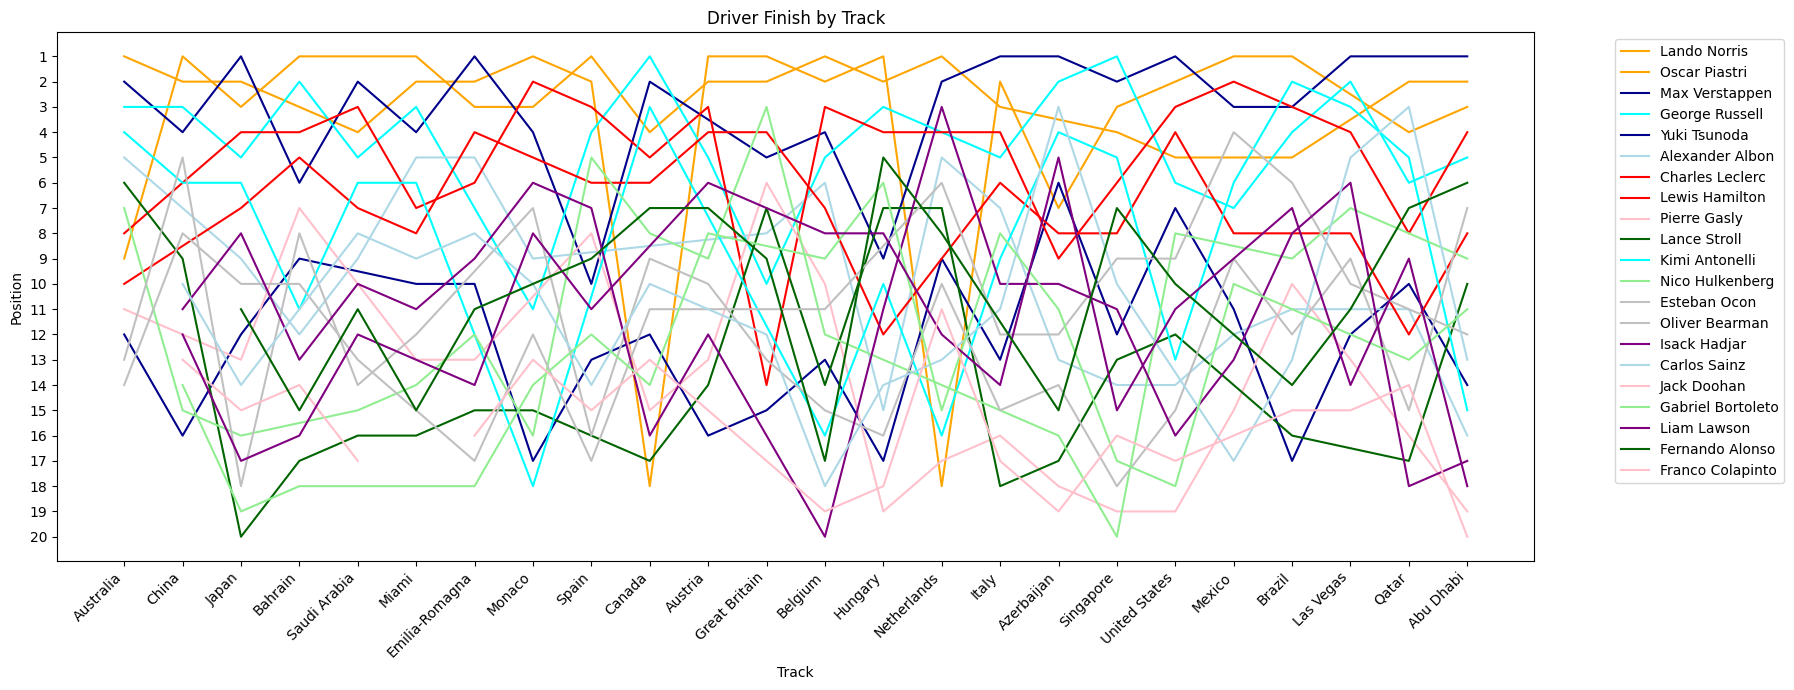

In [10]:
#7. Driver finishes across the season

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# only classified finishes
f12025['Position_racefin'] = pd.to_numeric(f12025['Position_race'], errors='coerce')

driver_colors = {'Max Verstappen': 'darkblue','Yuki Tsunoda': 'darkblue', 'Isack Hadjar': 'purple',
                 'Liam Lawson':'purple', 'George Russell' :'cyan', 'Kimi Antonelli': 'cyan', 'Oscar Piastri': 'orange',
                 'Lando Norris':'orange', 'Charles Leclerc': 'red', 'Lewis Hamilton':'red', 'Alexander Albon': 'lightblue',
                 'Carlos Sainz':'lightblue', 'Oliver Bearman': 'silver', 'Esteban Ocon': 'silver', 'Fernando Alonso':'darkgreen',
                 'Lance Stroll':'darkgreen', 'Nico Hulkenberg': 'lightgreen', 'Gabriel Bortoleto':'lightgreen', 'Pierre Gasly': 'pink',
                 'Jack Doohan': 'pink', 'Franco Colapinto':'pink'}

plt.figure(figsize=(18,7))
ax = sns.lineplot(
    data=f12025,
    x='Track',
    y='Position_racefin', # Use the numeric column here
    hue='Driver',
    palette=driver_colors,
    legend='full'
)

plt.xlabel('Track')
plt.ylabel('Position')
plt.title('Driver Finish by Track')
plt.xticks(rotation=45, ha='right')
plt.gca().invert_yaxis()


max_pos = int(f12025['Position_racefin'].max())
plt.yticks(np.arange(1, max_pos + 1, 1))

ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()

/tmp/ipython-input-2903190603.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(trackorder,rotation=45, ha='right')


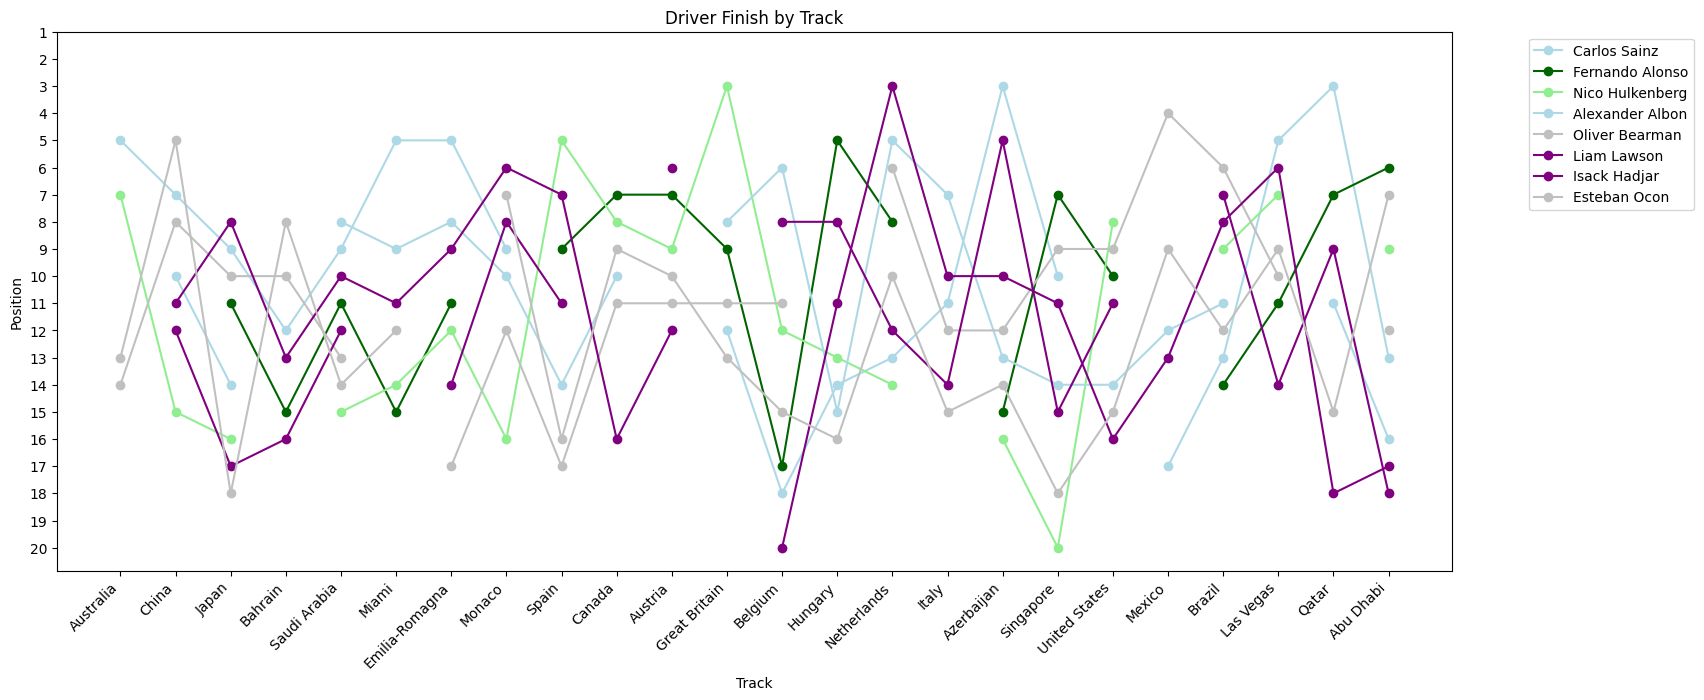

In [11]:
#looking at midfield so it is less messy 8th-15th is my arbitrary definition of midfield
#these are albon,sainz,hadjar,lawson,ocon,alonso, bearman, hulkenberg

midfield = {'Esteban Ocon','Oliver Bearman','Carlos Sainz','Alexander Albon','Nico Hulkenberg',
            'Fernando Alonso','Isack Hadjar','Liam Lawson'}
#plot position per track

midfieldplot = f12025[f12025['Driver'].isin(midfield)]
trackorder= f12025['Track'].unique()

fig,ax = plt.subplots(figsize=(18,7))

for driver in midfield:
  driver_data = midfieldplot[midfieldplot['Driver'] == driver]
  driver_data = driver_data.set_index('Track')
  driver_data = driver_data.reindex(trackorder)

  ax.plot(trackorder, driver_data['Position_racefin'], marker='o', label=driver, color=driver_colors[driver])

ax.set_xlabel('Track')
ax.set_ylabel('Position')
ax.set_title('Driver Finish by Track')
ax.set_xticklabels(trackorder,rotation=45, ha='right')
ax.invert_yaxis()
max_pos = int(f12025['Position_racefin'].max())
ax.set_yticks(np.arange(1, max_pos + 1, 1))
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()






/tmp/ipython-input-1724294828.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(trackorder,rotation=45, ha='right')


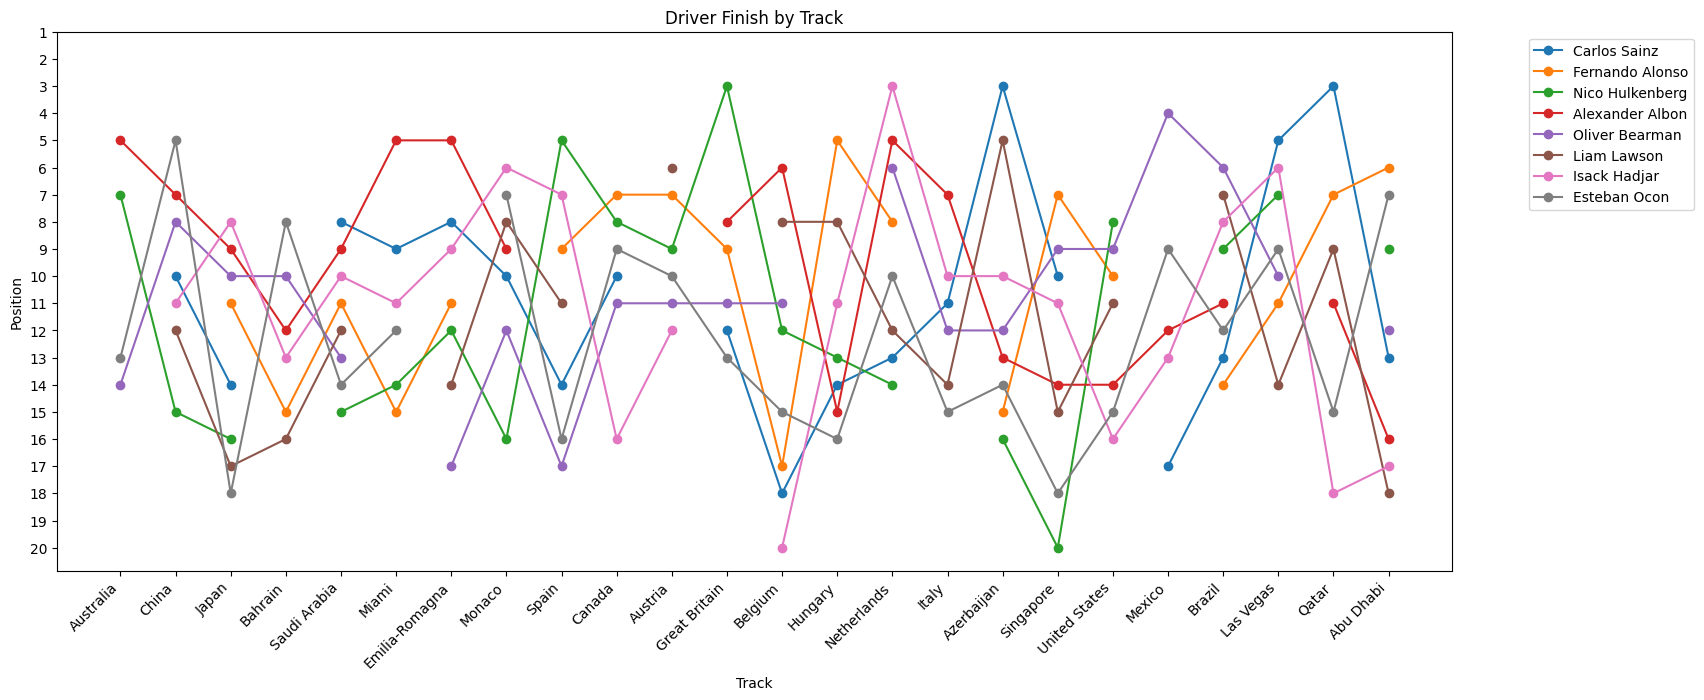

/tmp/ipython-input-1724294828.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  midfieldplot['Driver'] = pd.Categorical(midfieldplot['Driver'], categories=wdc_midfield[::-1], ordered=True)


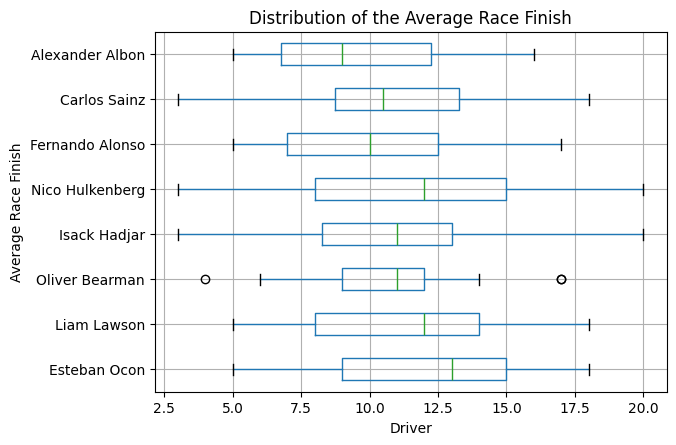

In [12]:
#editing code - getting rid of team colours for clarity

midfield = {'Esteban Ocon','Oliver Bearman','Carlos Sainz','Alexander Albon','Nico Hulkenberg',
            'Fernando Alonso','Isack Hadjar','Liam Lawson'}

wdc_order = [
    'Lando Norris',
    'Max Verstappen',
    'Oscar Piastri',
    'George Russell',
    'Charles Leclerc',
    'Lewis Hamilton',
    'Kimi Antonelli',
    'Alexander Albon',
    'Carlos Sainz',
    'Fernando Alonso',
    'Nico Hulkenberg',
    'Isack Hadjar',
    'Oliver Bearman',
    'Liam Lawson',
    'Esteban Ocon',
    'Lance Stroll',
    'Yuki Tsunoda',
    'Pierre Gasly',
    'Gabriel Bortoleto',
    'Franco Colapinto',
    'Jack Doohan'
]

wdc_midfield = ['Alexander Albon',
    'Carlos Sainz',
    'Fernando Alonso',
    'Nico Hulkenberg',
    'Isack Hadjar',
    'Oliver Bearman',
    'Liam Lawson',
    'Esteban Ocon']
#plot position per track

midfieldplot = f12025[f12025['Driver'].isin(midfield)]
trackorder= f12025['Track'].unique()

fig,ax = plt.subplots(figsize=(18,7))

for driver in midfield:
  driver_data = midfieldplot[midfieldplot['Driver'] == driver]
  driver_data = driver_data.set_index('Track')
  driver_data = driver_data.reindex(trackorder)

  ax.plot(trackorder, driver_data['Position_racefin'], marker='o', label=driver)
ax.set_xlabel('Track')
ax.set_ylabel('Position')
ax.set_title('Driver Finish by Track')
ax.set_xticklabels(trackorder,rotation=45, ha='right')
ax.invert_yaxis()
max_pos = int(f12025['Position_racefin'].max())
ax.set_yticks(np.arange(1, max_pos + 1, 1))
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

midfieldplot['Driver'] = pd.Categorical(midfieldplot['Driver'], categories=wdc_midfield[::-1], ordered=True)
midfieldplot.boxplot(column='Position_racefin', by='Driver', vert= False)
plt.title('Distribution of the Average Race Finish')
plt.suptitle('')
plt.xlabel('Driver')
plt.ylabel('Average Race Finish')
plt.show()

In [13]:
#8. number of fastest per driver

#2024 regs were top 10 got a point so filter

fastestlappoint= f12025[(f12025['Set Fastest Lap'] == 'Yes') & (f12025['Points'] > 0)]

fastestlaprace = fastestlappoint[['Track', 'Driver']]


lapcount=fastestlaprace.groupby('Driver')['Track'].count().sort_values(ascending=False)
print(lapcount)

# looking at the final points, if 2025 was the same was 2024, this would not change the standings

Driver
Oscar Piastri      6
Lando Norris       5
George Russell     3
Max Verstappen     3
Charles Leclerc    1
Kimi Antonelli     1
Lewis Hamilton     1
Name: Track, dtype: int64


/tmp/ipython-input-4246326763.py:10: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


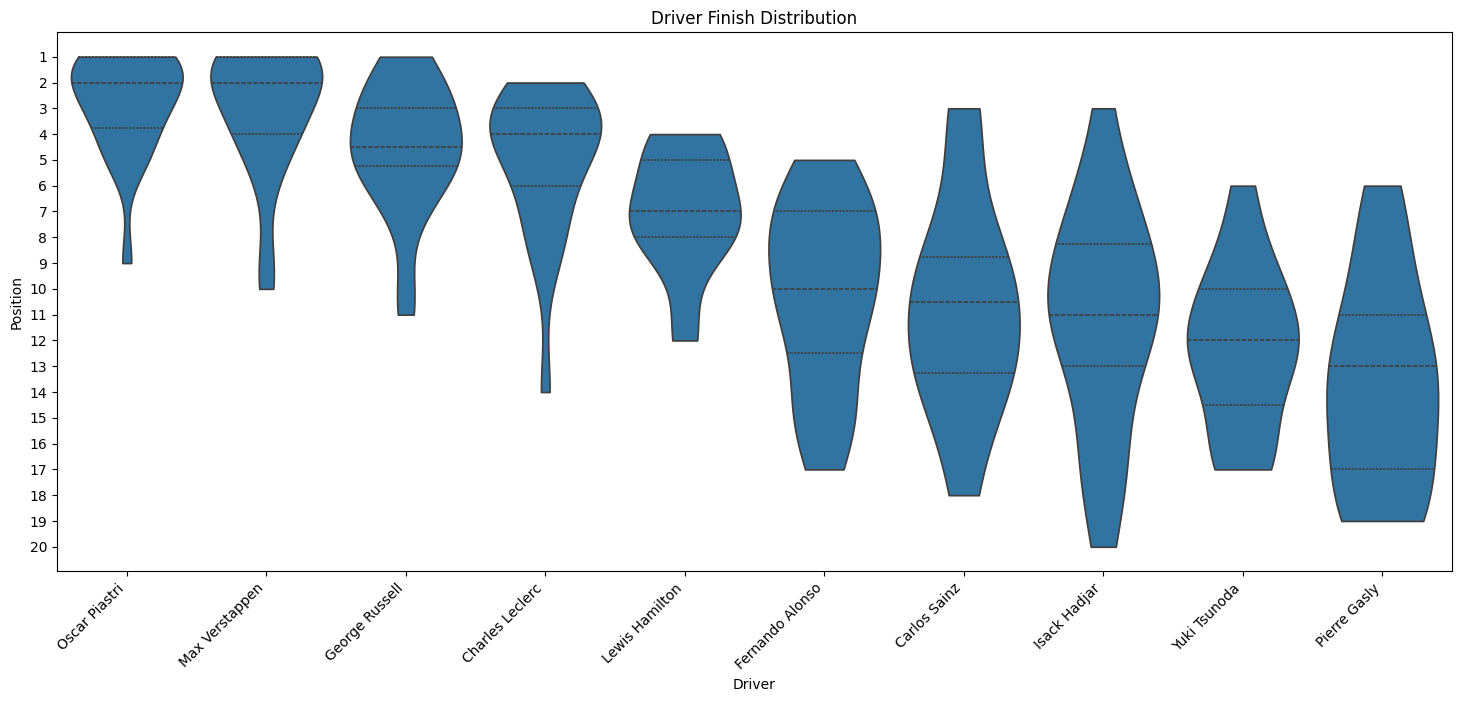

In [14]:
# 9. distribution of drivers finishes... choosing 10 random drivers

driverdist= {'Max Verstappen','Lewis Hamilton', 'Charles Leclerc',
            'Isack Hadjar', 'Fernando Alonso',
            'Carlos Sainz', 'George Russell',
           'Oscar Piastri', 'Pierre Gasly', 'Yuki Tsunoda'}
dist2025 = f12025[f12025['Driver'].isin(driverdist)]
finishorder=(dist2025.groupby('Driver')['Position_racefin'].mean().sort_values().index)
plt.figure(figsize=(18,7))
sns.violinplot(
    data=dist2025,
    x='Driver', y='Position_racefin', order= finishorder, inner='quartile', cut=0,scale='width')
plt.xlabel('Driver')
plt.ylabel('Position')
plt.title('Driver Finish Distribution')
plt.xticks(rotation=45, ha='right')
max_pos = int(f12025['Position_racefin'].max())
plt.yticks(np.arange(1, max_pos + 1, 1))
plt.gca().invert_yaxis()
plt.show()


<Figure size 640x480 with 0 Axes>

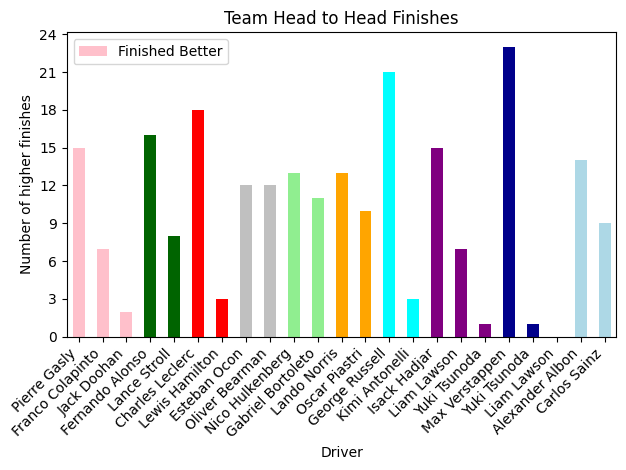

In [27]:
#10 team driver head to head

f12025['Team_order'] = (f12025.groupby(['Team', 'Track'])['Position_racefin'].rank(method='min')).astype(int)

f12025['Finished Better']= (f12025['Team_order']==1 ).astype(int)


seasonfinish= f12025.groupby(['Team', 'Driver'])['Finished Better'].sum().reset_index()
seasonfinish = seasonfinish.sort_values(['Team','Finished Better'], ascending= [True, False])
#print(seasonfinish)


plt.figure()
team_colors = {'Red Bull Racing Honda RBPT': 'darkblue', 'Racing Bulls Honda RBPT': 'purple', 'Mercedes' :'cyan', 'McLaren Mercedes': 'orange', 'Ferrari': 'red', 'Williams Mercedes': 'lightblue', 'Haas Ferrari': 'silver', 'Aston Martin Aramco Mercedes':'darkgreen', 'Kick Sauber Ferrari': 'lightgreen', 'Alpine Renault': 'pink'}
colors = [team_colors[team] for team in seasonfinish['Team']]
seasonfinish.plot(kind='bar', x= 'Driver', y='Finished Better', color=colors)
plt.title('Team Head to Head Finishes')
plt.xlabel('Driver')
plt.ylabel('Number of higher finishes')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.tight_layout()
plt.show()




